<a href="https://colab.research.google.com/github/Void-Sentry/Machine-Learning/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Titulo do Trabalho: Analise sobre Diabetes
alunos: Gustavo Maciel e Oseias Batista


CONTEUDO FOCO: Método de regreção ou Predição de dados;

- Base do conteudo: Estatátistica;
- Forma de representação: Modelo matemático;
- Lógica: Associa variáveis dependentes (Valores de saída) com independentes (Valores de entrada) buscando a partir dessa asosociação mapear uma saída;
- Fase do trabalho: Experimentação;
- OBS.: Quanto maior o grau de correlação entre os atributos, mais fácil é determinar um previsão positiva ou negativa a partir da associação deles;
- Para cada amostras existe um erro (Distância entre a reta prevista e a localização da amostra). O objetivo é reduzir ao máximo esse "erro"; -> Overfitting: Gera uma ilusão que está tudo dando certo;


## *`Bibliotecas Iniciais`*


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

## *Preparação dos dados*

In [ ]:
diabete = load_diabetes() # Base carregada do sklearn + Criação do objeto

In [ ]:
diabete.keys() # Dicionario do python compilando e suas chaves

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [ ]:
print(diabete['DESCR']) # Conteudos e informações pertecentes a base;

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

Terget = Atributo alvo: No caso seria uma 11ª coluna, uma medida quantitativa da progressão da doença um ano após a linha de base;

In [ ]:
print(diabete['target'])

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [ ]:
print(diabete['feature_names']) # Nomes dos atributos (Variaveis independentes);

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
print(diabete['data']) # Array dos dados

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


No método mais simples "Linear regression" 
Lembrando: Só possuimos 442 amostras;
- Para melhorar o grau de certeza nos resultados iremos realizar uma validação cruzada nos dados;
- Método: cross_val_predict();
- Algoritmo testado: LienarRegression();
- Dados de entrada: diabete.data;
- Dados de saída: diabete.target;
- Número de cruzamento: 10x;
- predictedCV: Armazena as predições resultantes das associações;

In [ ]:
predictedCV = cross_val_predict(LinearRegression(), diabete.data, diabete.target, cv=10)

Gráfico de dispersão:
- Eixo X: diabete.target;
- Eixo y: predictedCV

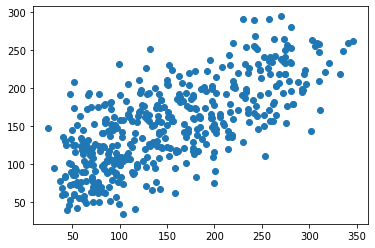

In [ ]:
plt.scatter(diabete.target, predictedCV)

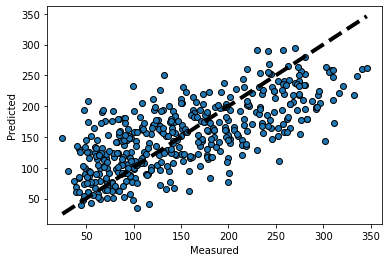

In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
X, y = datasets.load_diabetes(return_X_y=True)
predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Métricas de avaliação de regressão

Métricas da avaliações:
- ***Lembrando:*** ERRO = distancia dos valores supostos e preditos; 
- MAE: Erro Absoluto Médio -> É uma métrica mais realista;
- MSE: Erro Quadrático Médio -> Enfatiza os outliers;
- RMSE: Raiz do Erro Quadrático Médio;



In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(diabete.target, predictedCV))
print('MSE:', metrics.mean_squared_error(diabete.target, predictedCV))
print('RMSE:', np.sqrt(metrics.mean_squared_error(diabete.target, predictedCV)))

MAE: 44.21439555691926
MSE: 2999.032285678627
RMSE: 54.76342105528678


Métrica R-quadrado(R2):
- coeficiente de determinação;
- avalia a existência de uma relação útil entre a variável dependente(Y) e as variáveis independentes (Xi);
- quanto mais próximo a 1 o R-quadrado, melhor o modelo se ajusta aos seus dados;

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold  = KFold(n_splits=10, shuffle=True) # shuffle=True -> embaralha os dados

linearRegression_result = cross_val_score(LinearRegression(), diabete.data, diabete.target, cv=kfold) #scoring (métrica) padrão é r2

print(f'LinearRegression R2: {linearRegression_result.mean():.2f} +- {linearRegression_result.std():.2f}')

LinearRegression R2: 0.46 +- 0.16


## Classe Runregression:

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn import metrics

class runregression:
  '''
    Parâmetros de entrada:

    X: atributos de entradas
    y: atributo alvo
    model: algoritmo para construção do estimador
    cv: quantidade de folds da validação cruzada

    Guarda as métricas de cada execução em resultados e 
    Mostra os valores médios com desvio padrão para as métricas (mostraresultadomedio)   
  '''

  def __init__(self, X, y, model, cv = 5):
    
    self.__resultados = {
      'MAE': [],
      'MSE': [],
      'RMSE': [],
      'R2': []
    }

    print(f'validação cruzada com {cv} folds')
    self.__avaliamodelo_cv(X, y, model, cv)

  @property
  def resultados(self):
    return self.__resultados

  def __avaliamodelo_cv(self, X, y, model, cv):
    #gera as amostras para cv folds com embaralhamento (permite fazer várias validações cruzadas)
    kf = KFold(shuffle=True, n_splits=cv)
    #para cada fold: treina, testa e armazena os resultados
    for train_index, test_index in kf.split(X, y):
      model.fit(X[train_index], y[train_index])
      pred = model.predict(X[test_index])
      self.__resultados['MAE'].append(metrics.mean_absolute_error(y[test_index], pred))
      self.__resultados['MSE'].append(metrics.mean_squared_error(y[test_index], pred))
      self.__resultados['RMSE'].append(np.sqrt(metrics.mean_squared_error(y[test_index], pred)))
      self.__resultados['R2'].append(metrics.r2_score(y[test_index], pred))

  def mostraresultadomedio(self):
    print(f"MAE: {np.mean(self.__resultados['MAE']):.2f} +- {np.std(self.__resultados['MAE']):.2f}")
    print(f"MSE: {np.mean(self.__resultados['MSE']):.2f} +- {np.std(self.__resultados['MSE']):.2f}")
    print(f"RMSE: {np.mean(self.__resultados['RMSE']):.2f} +- {np.std(self.__resultados['RMSE']):.2f}")
    print(f"R2: {np.mean(self.__resultados['R2']):.2f} +- {np.std(self.__resultados['R2']):.2f}")

### Regreção Linear

In [ ]:
cross_validation_RL = runregression(diabete.data, diabete.target, LinearRegression(), cv = 10)
cross_validation_RL.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 44.21 +- 4.35
MSE: 2977.59 +- 497.51
RMSE: 54.37 +- 4.68
R2: 0.47 +- 0.13


### KNN regressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor


X_train, X_test, y_train, y_test = train_test_split(diabete.data, diabete.target, test_size=0.33)

#define os parâmetros a serem testados com o KNN
param_grid_knn = {'n_neighbors': range(1,40,2), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]} 
#cria o objeto do gridsearchcv
gridknn = GridSearchCV(KNeighborsRegressor(), param_grid_knn,  cv = 10, verbose = 1) 
#executa o gridsearchcv para a base separando X e y
gridknn.fit(X_train,y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.2s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
gridknn.best_params_

{'n_neighbors': 19, 'p': 3, 'weights': 'distance'}

In [ ]:
pred = gridknn.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2:', metrics.r2_score(y_test, pred))

MAE: 46.432368954899474
MSE: 3327.8428791270107
RMSE: 57.68745859480214
R2: 0.4757768766367808


In [ ]:
knn = gridknn.best_estimator_ #usa o melhor modelo encontrado pelo gridsearchcv
cross_validation_knn = runregression(diabete.data, diabete.target, knn, cv = 10)
cross_validation_knn.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 45.64 +- 3.97
MSE: 3252.75 +- 445.19
RMSE: 56.90 +- 3.90
R2: 0.43 +- 0.11


### SVM regressor


In [ ]:
from sklearn.svm import SVR

param_grid_svm = {
    'C': [1, 10, 100], 
    'gamma': ['auto', 'scale'], 
    'kernel': ['rbf', 'sigmoid']
} 
gridsvm = GridSearchCV(SVR(),param_grid_svm, verbose = 3)
gridsvm.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ........ C=1, gamma=auto, kernel=rbf, score=-0.010, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ........ C=1, gamma=auto, kernel=rbf, score=-0.005, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ........ C=1, gamma=auto, kernel=rbf, score=-0.037, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ........ C=1, gamma=auto, kernel=rbf, score=-0.021, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ........ C=1, gamma=auto, kernel=rbf, score=-0.075, total=   0.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .... C=1, gamma=auto, kernel=sigmoid, score=-0.012, total=   0.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .... C=1, g

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=10, gamma=auto, kernel=rbf, score=-0.008, total=   0.0s
[CV] C=10, gamma=auto, kernel=rbf ....................................
[CV] ........ C=10, gamma=auto, kernel=rbf, score=0.013, total=   0.0s
[CV] C=10, gamma=auto, kernel=rbf ....................................
[CV] ....... C=10, gamma=auto, kernel=rbf, score=-0.043, total=   0.0s
[CV] C=10, gamma=auto, kernel=sigmoid ................................
[CV] .... C=10, gamma=auto, kernel=sigmoid, score=0.001, total=   0.0s
[CV] C=10, gamma=auto, kernel=sigmoid ................................
[CV] .... C=10, gamma=auto, kernel=sigmoid, score=0.003, total=   0.0s
[CV] C=10, gamma=auto, kernel=sigmoid ................................
[CV] ... C=10, gamma=auto, kernel=sigmoid, score=-0.024, total=   0.0s
[CV] C=10, gamma=auto, kernel=sigmoid ................................
[CV] ... C=10, gamma=auto, kernel=sigmoid, score=-0.005, total=   0.0s
[CV] C=10, gamma=auto, kernel=sigmoid ................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
gridsvm.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}

In [ ]:
pred = gridsvm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2:', metrics.r2_score(y_test, pred))

MAE: 45.32699463543811
MSE: 3244.7309797887287
RMSE: 56.96254014515793
R2: 0.4888691953075448


In [ ]:
svm = gridsvm.best_estimator_ #usa o melhor modelo encontrado pelo gridsearchcv
cross_validation_svm = runregression(diabete.data, diabete.target, svm, cv = 10)
cross_validation_svm.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 43.61 +- 3.59
MSE: 3011.65 +- 428.68
RMSE: 54.75 +- 3.79
R2: 0.46 +- 0.11


### MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

param_grid_mlp = {
    'hidden_layer_sizes': [(100, ), (13,)], #default e heurístico
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [5000, 10000]
}

gridmlp = GridSearchCV(MLPRegressor(),param_grid_mlp, verbose = 1)
gridmlp.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reach

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_sta...
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['identity', '

In [ ]:
gridmlp.best_params_

{'activation': 'identity',
 'hidden_layer_sizes': (100,),
 'learning_rate_init': 0.1,
 'max_iter': 5000}

In [ ]:
pred = gridmlp.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2:', metrics.r2_score(y_test, pred))

MAE: 45.06305094494678
MSE: 3275.497911260112
RMSE: 57.23196581684148
R2: 0.48402259121653035


In [ ]:
mlp = gridmlp.best_estimator_ #usa o melhor modelo encontrado pelo gridsearchcv
cross_validation_mlp = runregression(diabete.data, diabete.target, mlp, cv = 10)
cross_validation_mlp.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 44.51 +- 5.39
MSE: 3017.87 +- 564.09
RMSE: 54.69 +- 5.16
R2: 0.48 +- 0.09
